<a href="https://colab.research.google.com/github/palash04/Artificial-Intelligence/blob/master/Neural_Networks/Intro_to_Pytorch/_05_Downloading_dataset_to_loading_dataset_using_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Artificial Intelligence/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [21]:
%cd /content/gdrive/My Drive/Artificial Intelligence/DataSet/CatsAndDogs

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-21-933ed02bf543>", line 1, in <module>
    get_ipython().magic('cd /content/gdrive/My Drive/Artificial Intelligence/DataSet/CatsAndDogs')
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2160, in magic
    return self.run_line_magic(magic_name, magic_arg_s)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2081, in run_line_magic
    result = fn(*args,**kwargs)
  File "<decorator-gen-91>", line 2, in cd
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/magic.py", line 188, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/magics/osm.py", line 288, in cd
    oldcwd = py3compat.getcwd()
OSError: [Errno 107] Transport endpoint is 

OSError: ignored

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 22% 122M/543M [00:01<00:03, 120MB/s]
User cancelled operation
Error in atexit._run_exitfuncs:
Traceback (most recent call last):
  File "/usr/lib/python2.7/atexit.py", line 24, in _run_exitfuncs
^C


In [ ]:
!ls

sampleSubmission.csv  test1  train1  train.zip


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       
  inflating: train/dog.5520.jpg      
  inflating: train/dog.5521.jpg      
  inflating: train/dog.5522.jpg      

In [ ]:
%cd /content/gdrive/My Drive/Artificial Intelligence/DataSet/CatsAndDogs/train1/train

/content/gdrive/My Drive/Artificial Intelligence/DataSet/CatsAndDogs/train1/train


In [ ]:
!ls

cat.0.jpg      cat.11910.jpg  cat.2570.jpg  cat.4480.jpg  cat.6390.jpg
cat.10000.jpg  cat.11911.jpg  cat.2571.jpg  cat.4481.jpg  cat.6391.jpg
cat.10001.jpg  cat.11912.jpg  cat.2572.jpg  cat.4482.jpg  cat.6392.jpg
cat.10002.jpg  cat.11913.jpg  cat.2573.jpg  cat.4483.jpg  cat.6393.jpg
cat.10003.jpg  cat.11914.jpg  cat.2574.jpg  cat.4484.jpg  cat.6394.jpg
cat.10004.jpg  cat.11915.jpg  cat.2575.jpg  cat.4485.jpg  cat.6395.jpg
cat.10005.jpg  cat.11916.jpg  cat.2576.jpg  cat.4486.jpg  cat.6396.jpg
cat.10006.jpg  cat.11917.jpg  cat.2577.jpg  cat.4487.jpg  cat.6397.jpg
cat.10007.jpg  cat.11918.jpg  cat.2578.jpg  cat.4488.jpg  cat.6398.jpg
cat.10008.jpg  cat.11919.jpg  cat.2579.jpg  cat.4489.jpg  cat.6399.jpg
cat.10009.jpg  cat.1191.jpg   cat.257.jpg   cat.448.jpg   cat.639.jpg
cat.1000.jpg   cat.11920.jpg  cat.2580.jpg  cat.4490.jpg  cat.63.jpg
cat.10010.jpg  cat.11921.jpg  cat.2581.jpg  cat.4491.jpg  cat.6400.jpg
cat.10011.jpg  cat.11922.jpg  cat.2582.jpg  cat.4492.jpg  cat.6401.jpg
cat.10012

In [1]:
trainfilepath = '/content/drive/My Drive/Artificial Intelligence/DataSet/CatsAndDogs/train1'
testfilepath = '/content/drive/My Drive/Artificial Intelligence/DataSet/CatsAndDogs/test'

In [2]:
# Let' see if the data is loaded or not
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

In [3]:
# Loading the data

transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])

dataset = datasets.ImageFolder(trainfilepath,transform = transform)
dataloader = torch.utils.data.DataLoader(dataset,batch_size=32,shuffle=True)


In [4]:
len(dataloader)

332

In [5]:
images,labels = next(iter(dataloader))

In [7]:
images.shape

torch.Size([32, 3, 224, 224])

In [8]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

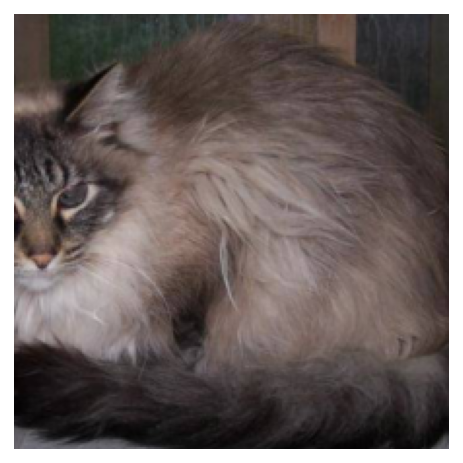

In [9]:
imshow(images[0],normalize=False)

In [11]:
trainfilepath = '/content/drive/My Drive/Artificial Intelligence/DataSet/CatsAndDogs/train1'
testfilepath = '/content/drive/My Drive/Artificial Intelligence/DataSet/CatsAndDogs/test'

In [15]:
# Define transforms for the training data and testing data
train_transform = transforms.Compose([transforms.RandomRotation(30),
                                      transforms.RandomResizedCrop(224),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor()])

test_transform = transforms.Compose([transforms.Resize(255),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor()])

train_data = datasets.ImageFolder(trainfilepath, transform = transform)
test_data = datasets.ImageFolder(testfilepath,transform=transform)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32,shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32)

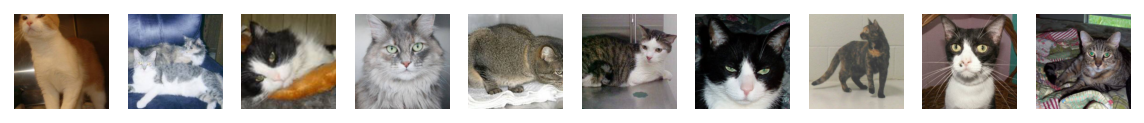

In [18]:
data_iter = iter(trainloader)

images,labels = next(data_iter)
fig,axes = plt.subplots(figsize = (10,4), ncols = 10)
for ii in range(10):
    ax = axes[ii]
    imshow(images[ii], ax=ax, normalize=False)

In [21]:
labels.shape

torch.Size([32])